<h1>Supervised Learning</h1>

<hr>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from rdkit import Chem
from rdkit.Chem import AllChem

from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix

In [22]:
df = pd.read_csv('cyp3a4-clean.smi', sep='\t')
fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(s), 2, nBits=2048) for s in df.smiles.tolist()]

pca = PCA(n_components=1024)
crds_pca = pca.fit_transform(fps)

y_true_cls = np.array(df.status.astype('int64').tolist())
y_true_reg = np.array(df.pval.tolist()).reshape(-1, 1)

<h2>Classification algorithms</h2>

<hr>

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [23]:
X = crds_pca[:int(0.75 * len(crds_pca))]
y = y_true_cls[:int(0.75 * len(y_true_cls))]

X_val = crds_pca[int(0.75 * len(crds_pca)):]
y_val = y_true_cls[int(0.75 * len(y_true_cls)):]

<h3>Gaussian Naive Bayes</h3>

In [24]:
# prediction
model.fit(X, y)
y_pred = model.predict(X_val)

In [25]:
# coefficient of determination (R²)
r_sq = model.score(X, y)
print(f"Coefficient of determination: {round(r_sq, 3)}")

Coefficient of determination: 0.918


Text(113.92222222222219, 0.5, 'predicted label')

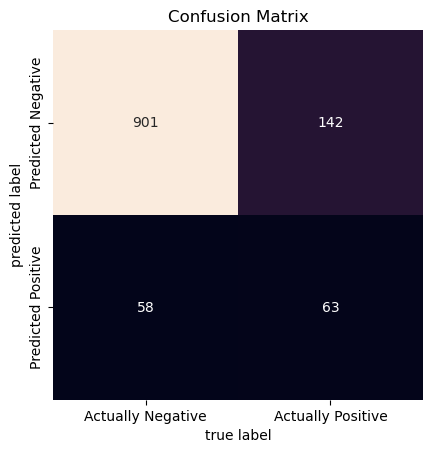

In [26]:
# confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [27]:
print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', round(precision_score(y_val, y_pred), 2), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

Recall: 0.31 
Precision 0.52 
Accuracy 0.83


<h2>Machine learning models valudation algorithms</h2>

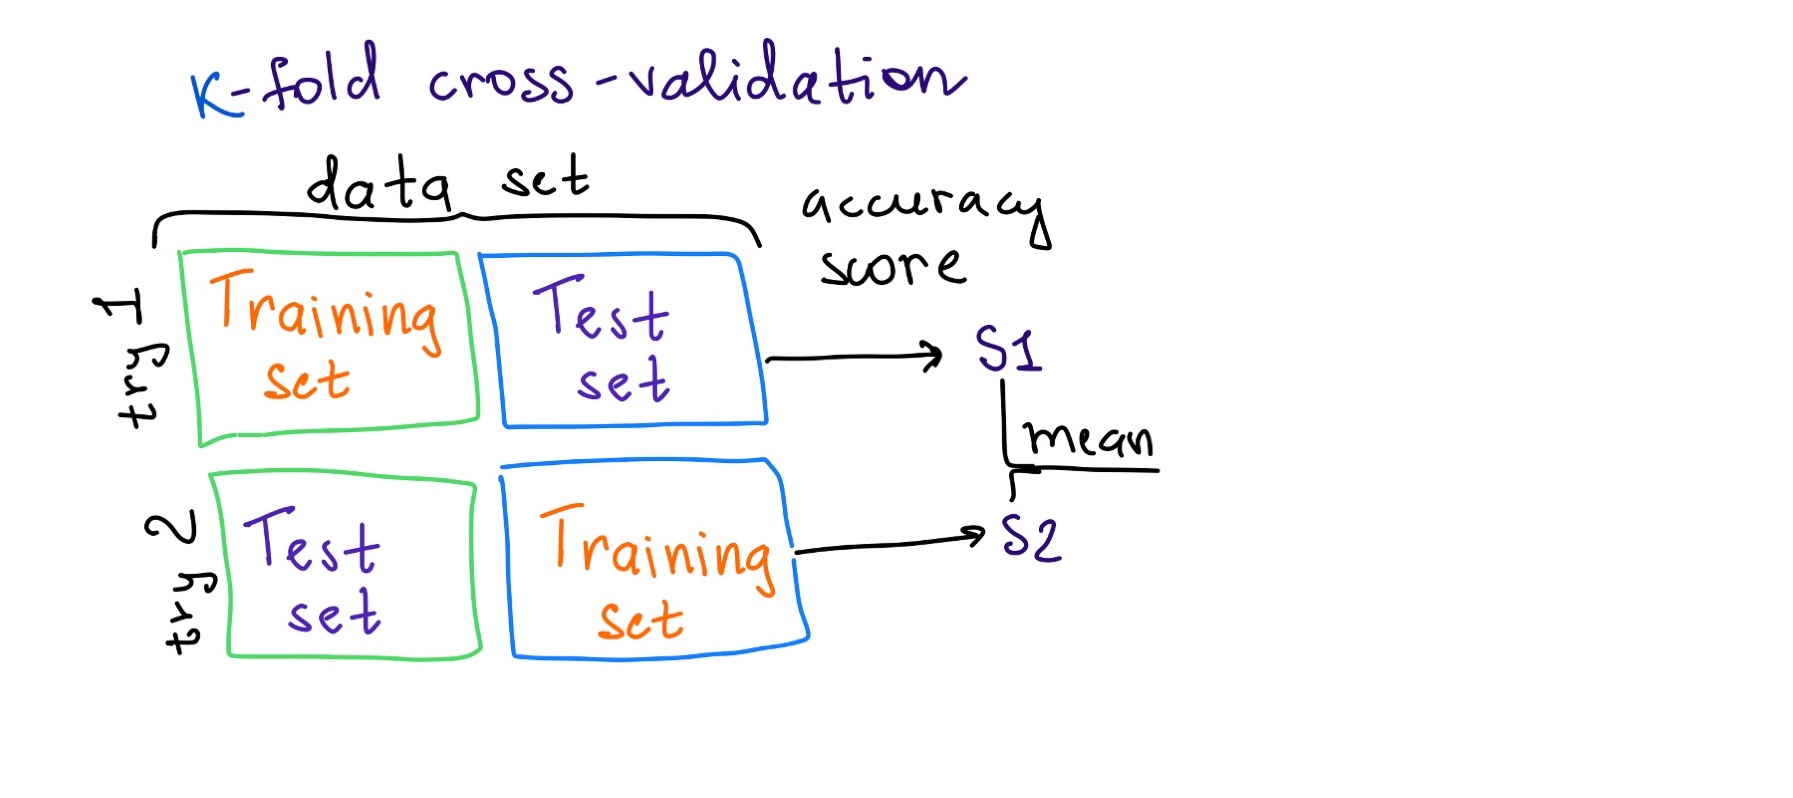

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

In [ ]:
model = GaussianNB()

# Shuffle data and apply 5-fold cross-validation technique
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(model, X, y, cv=5, scoring='precision')

print("%0.2f precision with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

<h3>C-Support Vector Classification</h3>

In [28]:
model = SVC(kernel='linear', C=1, random_state=0)

scoring = ['recall', 'precision']
scores = cross_validate(model, X, y, scoring=scoring)

print("%0.2f precision with a standard deviation of %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))

0.33 precision with a standard deviation of 0.05
0.42 recall with a standard deviation of 0.08


Recall: 0.5 
Precision 0.2841225626740947 
Accuracy 0.69


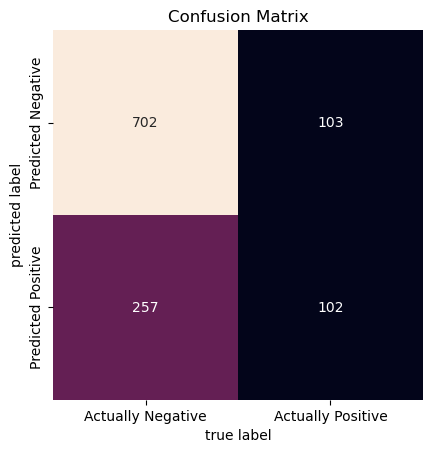

In [29]:
model.fit(X, y)
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', precision_score(y_val, y_pred), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

<h3>Decision Tree Classifier</h3>

In [30]:
model = DecisionTreeClassifier(criterion="entropy", random_state=0)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(model, X, y, cv=5, scoring='precision')

print("%0.2f precision with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.33 precision with a standard deviation of 0.05


Recall: 0.3 
Precision 0.23220973782771537 
Accuracy 0.7


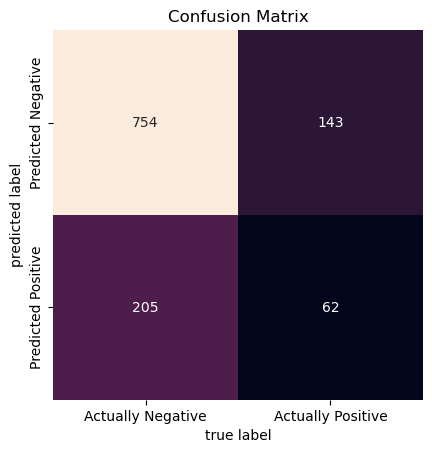

In [31]:
model.fit(X, y)
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', precision_score(y_val, y_pred), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

<h3>Scikit-learn Pipeline</h3>

[Scikit-learn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) of transforms with a final estimator

In [ ]:
from sklearn.pipeline import Pipeline

In [14]:
pipe = Pipeline([
#          ('gaussian', GaussianNB()),
#          ('dtree', DecisionTreeClassifier()),
#          ('svc', SVC()),
         ('knn', KNeighborsClassifier())
])
pipe.fit(X, y)
print(f"Coefficient of determination: {round(pipe.score(X, y), 3)}")

Coefficient of determination: 0.893


<h3>Grid Search Cross-Validation</h3>

It runs through all the different parameters that is fed into the parameter grid and produces the best combination of parameters, based on a scoring metric of your choice

In [ ]:
from sklearn.model_selection import GridSearchCV

In [15]:
pipe = Pipeline([
#     ('nb', GaussianNB()),
#     ('dtc', DecisionTreeClassifier()),
#     ('svc', SVC()),
    ('knn', KNeighborsClassifier())
                    ])

params = [{
#     'dtc__max_depth':[3, 10]
#     'svc__kernel':('linear', 'rbf'), 
#     'svc__C':[1, 10],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'cosine'],
    'knn__leaf_size': [15, 20]
          }]

gs = GridSearchCV(pipe,
                  param_grid=params,
                  scoring='recall',
                  cv=5)

gs.fit(X, y)
print('The best parametrs:', gs.best_params_,
      '\nScore:', round(gs.score(X, y), 3))

The best parametrs: {'knn__leaf_size': 15, 'knn__metric': 'cosine', 'knn__n_neighbors': 3, 'knn__weights': 'distance'} 
Score: 0.997


Recall: 0.31 
Precision 0.5294117647058824 
Accuracy 0.83


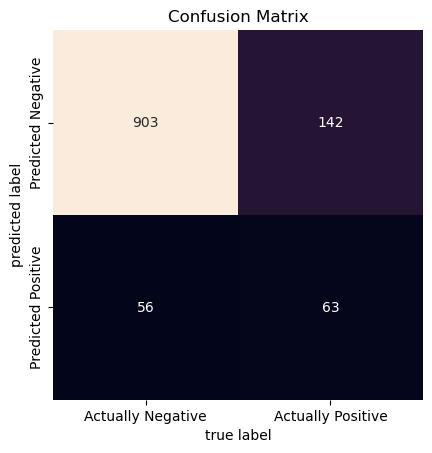

In [16]:
model = KNeighborsClassifier(leaf_size=15, n_neighbors=3, weights='uniform')
model.fit(X, y)
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Actually Negative', 'Actually Positive'], 
            yticklabels=['Predicted Negative', 'Predicted Positive'])

plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

print("Recall:", round(recall_score(y_val, y_pred), 2), 
      '\nPrecision', precision_score(y_val, y_pred), 
      '\nAccuracy', round(accuracy_score(y_val, y_pred), 2))

<h2>Regresion algorithms</h2>

<hr>

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [17]:
y = y_true_reg[:int(0.75 * len(y_true_reg))].ravel()

In [18]:
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
rf.fit(X, y)
y_pred = rf.predict(X_val)

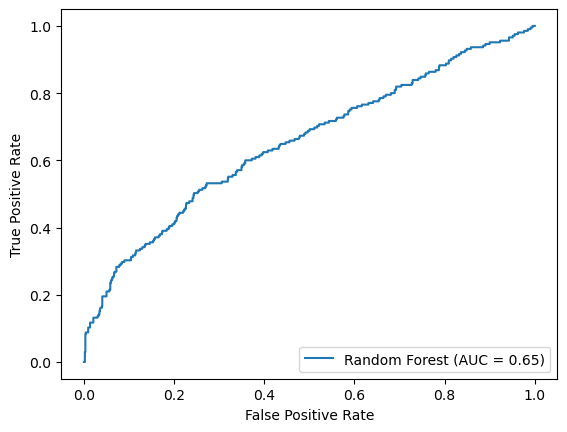

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Random Forest')
display.plot()

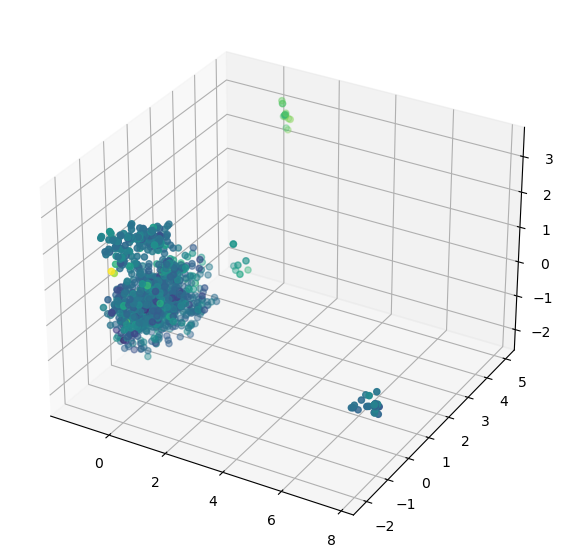

In [20]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_val[:, 0], X_val[:, 1], X_val[:, 2], c=y_pred)
plt.show()